## Linking GitHub Dataset

In [ ]:
!git clone https://github.com/picklesueat/data_jobs_data.git

Cloning into 'data_jobs_data'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 85 (delta 41), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 14.09 MiB | 3.68 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
%cd "data_jobs_data/data"
!ls

/content/data_jobs_data/data
BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


# Loading the dataset


In [ ]:
import pandas as pd

DataScientist = pd.read_csv("DataScientist.csv")
DataScientist.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
DataScientist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

# Data Cleaning

In [ ]:
dataScientist_df = DataScientist[["Job Title", "Job Description", "Company Name", "Location", "Industry", "Sector","Rating"]].copy()

In [ ]:
dataScientist_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,Travel & Tourism,3.5
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",Consumer Services,4.5
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,"New York, NY",-1,-1,-1.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,Information Technology,3.4
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,Business Services,3.4


## Checking Unqiue Values

In [ ]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    print(f"{col}: {dataScientist_df[col].nunique()} unique values")

Job Title: 2079 unique values
Company Name: 2075 unique values
Location: 191 unique values
Industry: 96 unique values
Sector: 26 unique values


## Removing NULL rows

In [ ]:
dataScientist_df.dropna(subset=["Job Title", "Company Name", "Location"], inplace=True)

## Converting values into strings-removing extra spaces

In [ ]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    DataScientist_df[col] = DataScientist_df[col].astype(str).str.strip()

## Normalize Whitespace in Job Descriptions


In [ ]:
dataScientist_df["Job Description"] = dataScientist_df["Job Description"].str.replace(r"\s+", " ", regex=True).str.strip()
dataScientist_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Senior Data Scientist,"ABOUT HOPPER At Hopper, we’re on a mission to ...",Hopper\n3.5,"New York, NY",Travel Agencies,Travel & Tourism,3.5
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",Consumer Services,4.5
2,Data Science Manager,Decode_M https://www.decode-m.com/ Data Scienc...,Decode_M,"New York, NY",-1,-1,-1.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,Information Technology,3.4
4,"Director, Data Science","Director, Data Science - (200537) Description ...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,Business Services,3.4


## Cleaning the Company Format

In [ ]:
dataScientist_df["Company Name"] = dataScientist_df["Company Name"].str.replace(r"\n\d+(\.\d+)?", "", regex=True).str.strip()
dataScientist_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Senior Data Scientist,"ABOUT HOPPER At Hopper, we’re on a mission to ...",Hopper,"New York, NY",Travel Agencies,Travel & Tourism,3.5
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Noom US,"New York, NY","Health, Beauty, & Fitness",Consumer Services,4.5
2,Data Science Manager,Decode_M https://www.decode-m.com/ Data Scienc...,Decode_M,"New York, NY",-1,-1,-1.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital,"Lyndhurst, NJ",Internet,Information Technology,3.4
4,"Director, Data Science","Director, Data Science - (200537) Description ...",United Entertainment Group,"New York, NY",Advertising & Marketing,Business Services,3.4


## Checking unquie values in the dataset

In [ ]:
for col in ["Company Name", "Location", "Industry", "Sector"]:
    print(f"\nUnique values in '{col}':")
    print(dataScientist_df[col].unique())


Unique values in 'Company Name':
['Hopper' 'Noom US' 'Decode_M' ... 'Creative Financial Staffing'
 'ComResource' 'Data Resource Technologies']

Unique values in 'Location':
['New York, NY' 'Lyndhurst, NJ' 'Brooklyn, NY' 'Jersey City, NJ'
 'Carle Place, NY' 'Newark, NJ' 'Franklin Lakes, NJ' 'Port Washington, NY'
 'Rockville Centre, NY' 'Queens Village, NY' 'Fort Lee, NJ'
 'Middletown, NJ' 'Florham Park, NJ' 'Summit, NJ' 'Maywood, NJ'
 'West Orange, NJ' 'Los Angeles, CA' 'Woodland Hills, CA'
 'Universal City, CA' 'Anaheim, CA' 'Culver City, CA' 'Cerritos, CA'
 'Santa Monica, CA' 'Torrance, CA' 'El Segundo, CA' 'Glendale, CA'
 'Brea, CA' 'Burbank, CA' 'Westmont, CA' 'Pasadena, CA' 'Irwindale, CA'
 'Calabasas, CA' 'Hermosa Beach, CA' 'Whittier, CA' 'Northridge, CA'
 'Marina del Rey, CA' 'Monaco, CA' 'Venice, CA' 'Sherman Oaks, CA'
 'Duarte, CA' 'Wilmington, CA' 'Long Beach, CA' 'Monrovia, CA'
 'Carson, CA' 'Seal Beach, CA' 'Monterey Park, CA' 'Chicago, IL'
 'Evanston, IL' 'Melrose Park, I

## Data Viz - Top Job titles

/tmp/ipython-input-3731384349.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


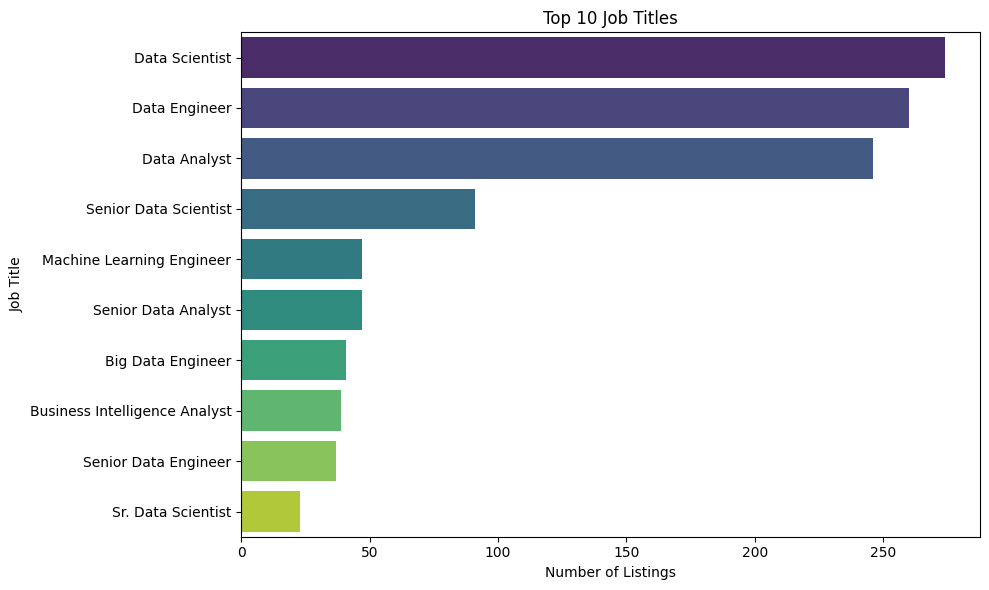

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_job_titles = dataScientist_df["Job Title"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

## Saving the cleaned dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the directory path
save_dir = '/content/drive/My Drive/CleanDatasets'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the dataframe to the specified directory
dataScientist_df.to_csv(f'{save_dir}/cleaned_dataScientist.csv', index=False)
print(f"Cleaned dataset saved to Google Drive in '{save_dir}'.")

Mounted at /content/drive
Cleaned dataset saved to Google Drive in '/content/drive/My Drive/CleanDatasets'.
